# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering">Data Gathering</a></li>
<li><a href="#Assessing">Accessing Data</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>
<li><a href="#Storing">Data Storing</a></li>
<li><a href="#EDA">Explanatory Data Analysis</a></li>
<li><a href="#Conclusion">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project is a Data Wrangling, Analizing and Visualization of the tweet archives of WeRateDogs Twitter account. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. <br>

> The project involves three dataset which would be wrangled and combined before analysis. Twitter API via python library "tweepy" was used to pull the data directly from WeRateDogs Twitter Page

> The datasets are;
- Enhanced Twitter Archive.
- Additional Data via the Twitter API.
- and the Additional Data via the Twitter API

In [616]:
# import necessary modules
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import re
import json
import tweepy
from timeit import default_timer as timer
from twitter_authentication import api_key, api_key_secret, access_token, access_token_secret

In [357]:
warnings.filterwarnings("ignore")

<a id='Gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
# since we already have this already downloaded, lets import and load

twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

#display
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
folder_name = 'Project 2'

# Creating Request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#saving file
# Lets check if the file already exists in the folder

if os.path.exists("image-predictions.tsv"):
    print("File already exists")
else:
    with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)
        

File already exists


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [11]:
# Loading creditential keys

API_KEY = api_key
API_KEY_SECRET = api_key_secret
ACCESS_TOKEN = access_token
ACCESS_TOKEN_SECRET = access_token_secret

# Authentication
auth = tweepy.OAuthHandler(API_KEY, API_KEY_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit = True)

> The API credentials have been loaded and the connection to the API has been created, let us proceed to extract the tweet ids we would use to query the API from the twitter_archive table

In [14]:
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

> We are Expecting 2356 queries from the API

In [23]:
# Checking if the file already exist
if os.path.exists("tweet_json.txt"):
    print("File already exists")
else:
    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.errors.TweepyException as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 262


Success
947: 752568224206688256
Success
948: 752519690950500352
Success
949: 752334515931054080
Success
950: 752309394570878976
Success
951: 752173152931807232
Success
952: 751950017322246144
Success
953: 751937170840121344
Success
954: 751830394383790080
Success
955: 751793661361422336
Success
956: 751598357617971201
Success
957: 751583847268179968
Success
958: 751538714308972544
Success
959: 751456908746354688
Success
960: 751251247299190784
Success
961: 751205363882532864
Success
962: 751132876104687617
Success
963: 750868782890057730
Success
964: 750719632563142656
Success
965: 750506206503038976
Success
966: 750429297815552001
Success
967: 750383411068534784
Success
968: 750381685133418496
Success
969: 750147208377409536
Success
970: 750132105863102464
Success
971: 750117059602808832
Success
972: 750101899009982464
Success
973: 750086836815486976
Success
974: 750071704093859840
Success
975: 750056684286914561
Success
976: 750041628174217216
Success
977: 750026558547456000
Success


Rate limit reached. Sleeping for: 271


Success
1847: 675822767435051008
Success
1848: 675820929667219457
Success
1849: 675798442703122432
Success
1850: 675781562965868544
Success
1851: 675740360753160193
Success
1852: 675710890956750848
Success
1853: 675707330206547968
Success
1854: 675706639471788032
Success
1855: 675534494439489536
Success
1856: 675531475945709568
Success
1857: 675522403582218240
Success
1858: 675517828909424640
Success
1859: 675501075957489664
Success
1860: 675497103322386432
Success
1861: 675489971617296384
Success
1862: 675483430902214656
Success
1863: 675432746517426176
Success
1864: 675372240448454658
Success
1865: 675362609739206656
Success
1866: 675354435921575936
Success
1867: 675349384339542016
Success
1868: 675334060156301312
Success
1869: 675166823650848770
Success
1870: 675153376133427200
Success
1871: 675149409102012420
Success
1872: 675147105808306176
Success
1873: 675146535592706048
Success
1874: 675145476954566656
Success
1875: 675135153782571009
Success
1876: 675113801096802304
Success
18

In [116]:
len(fails_dict)

29

> The process took 2205 seconds or 37 mins to completely extract data for the 2356 queries

> Some of the tweets has been deleted, we used the "TweepException" error to skip those values

> 29 of those tweets have been deleted 

> We would proceed to accessing these data we just loaded

<a id='Assessing'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.


In [479]:
# Readng and Accesssing all data

> Tweet_json Data

In [480]:
# reading the downloaded JSON

tweet_json = pd.read_json("tweet_json.txt",lines=True)

tweet_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2323,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2325,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [481]:
# checking dataframe info

tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

> We dont need all the information in the table, we would be extracting the ones we needed into a new table

In [482]:
# extracting only needed information from the json dataframe
# Using the colum index 

tweet_rem = tweet_json.iloc[:, [1,20,21]]

tweet_rem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [483]:
# Checking the statistics of the data

tweet_rem.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2475.707778,7063.231629
std,6.820795e+16,4192.275715,10976.121685
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,496.500000,1225.500000
50%,7.178418e+17,1151.000000,3053.000000
75%,7.986547e+17,2866.000000,8616.000000
max,8.924206e+17,70886.000000,145083.000000


> twitter_archive table

In [484]:
# Checking twitter archive dataframe info

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [485]:
# Checking rating_numerator column
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [486]:
#Checking rating_denominator column

twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [487]:
#Checking the names column

twitter_archive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [488]:
#Checking the correlation between the text and name column

twitter_archive[['text', 'name']]

,text,name
0,This is Phineas. He's a mystical boy. Only eve...,Phineas
1,This is Tilly. She's just checking pup on you....,Tilly
2,This is Archie. He is a rare Norwegian Pouncin...,Archie
3,This is Darla. She commenced a snooze mid meal...,Darla
4,This is Franklin. He would like you to stop ca...,Franklin
...,...,...
2351,Here we have a 1949 1st generation vulpix. Enj...,None
2352,This is a purebred Piers Morgan. Loves to Netf...,a
2353,Here is a very happy pup. Big fan of well-main...,a
2354,This is a western brown Mitsubishi terrier. Up...,a


In [489]:
#Ckecking for duplicated values

twitter_archive.duplicated().sum()

0

In [490]:
twitter_archive.iloc[2260][5]

'RT @dogratingrating: Unoriginal idea. Blatant plagiarism. Curious grammar. -5/10 https://t.co/r7XzeQZWzb'

> Image_pred table

In [491]:
# reading tsv file

image_pred = pd.read_csv("image-predictions.tsv", sep='\t')

image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [492]:
# Checking Table info

image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [493]:

image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
convertible             1
lion                    1
sliding_door            1
toilet_seat             1
studio_couch            1
Name: p1, Length: 378, dtype: int64

### Quality issues
##### `twitter_archive` table
1. tweet text column should only contain the text

2. Some entries are not original tweets (replies and retweets)

3. Drop columns that are essentially empty

4. Timestamp column is not in appropriate format

5. Ratings not extracted correctly (decimal ratings)

6. Rating_numerator column contain outlier values (1776, 204,0)

7. Ratings_denominator column has values more or less than 10

8. Some dogs name were incorrectly entered (a, an, the)

##### `image_pred` table
9. Get the final prediction of the dog breed from the three predicted values
   
10.  Capitalize each dog name

##### `tweet_rem` table
11. rename 'id' column to 'tweet_id'

### Tidiness issues

1. Dog stages should be combined to one column 

2. Merge three DataFrame to One Master dataFrame

<a id='Cleaning'></a>
## Cleaning Data
In this section, **all** documented data issues would be cleaned. 


In [777]:
# Making  copies of the data before cleaning
twitter_archive_clean = twitter_archive.copy()
tweet_rem_clean = tweet_rem.copy()
image_pred_clean = image_pred.copy()

### Quality issue 1: tweet text column should only contain the text

#### Define: 

Change twitter_archive timestamp column datatype to datetime64

#### Code

In [778]:
twitter_archive_clean.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [779]:
#view

twitter_archive_clean.text[0]


"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

We need to rid the rating and the link, leaving only plain text

In [780]:
import re

In [781]:
# Function to clean text

def clean_text(text):
    text = re.sub(r'\d\d[/]\d\d', '', text) # remove rating 
    text = re.sub(r'#', '', text) # remove hash tag
    text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
    
    return text


In [782]:
twitter_archive_clean.text = twitter_archive_clean.text.apply(clean_text)

#### Test

In [783]:
twitter_archive_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.  "

### Quality issue 2: Some entries are not original tweets (replies and retweets)

#### Define

We have some texts in the column that are retweets or replies, and we dont want the in the dataframe as per the project specification.  .<br>
They are indicated by those rows having values in `retweeted_status_id` and `in_reply_to_status_id`

In [784]:
#Viewing the problem
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [785]:
# Identifying number of retweet row
twitter_archive_clean.retweeted_status_id.notnull().sum()

181

In [786]:
# Identifying number of reply rows
twitter_archive_clean.in_reply_to_status_id.notnull().sum()

78

We have identified 181 of those texts are retweet and 78 are replies. We would then proceed to remove those rows from the DataFrame

#### Code

In [787]:
#retweets
retweets = twitter_archive_clean.retweeted_status_id.notnull()

#removing them from the dataframe by applying negation principle
twitter_archive_clean = twitter_archive_clean[~retweets]

In [788]:
#replies
replies = twitter_archive_clean.in_reply_to_status_id.notnull()

#removing them from the dataframe
twitter_archive_clean = twitter_archive_clean[~replies]

#### Test

In [789]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

Above is a table free of retweets and replies, We would proceed to drop them next as they are essentially empty

### Quality issue 3: Drop columns that are essentially empty or not of any importance

#### Define 

In twitter_archive table, columns: <br>
- retweeted_status_id <br>
- in_reply_to_user_id <br>
- retweeted_status_timestamp  <br>
- in_reply_to_status_id <br>
- retweeted_status_user_id <br>
are all empty columns that beds to be removed
<br>
- expanded_urls
- source <br>
are not of any importance and would be removed

#### Code

In [790]:
# Dropping empty columns

twitter_archive_clean.drop(['retweeted_status_id','in_reply_to_user_id','retweeted_status_timestamp',
                            'in_reply_to_status_id', 'retweeted_status_user_id'], axis = 1, inplace = True)

In [791]:
# Dropping not needed columns

twitter_archive_clean.drop(['expanded_urls','source'], axis = 1, inplace = True)

#### Test

In [792]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   text                2097 non-null   object
 3   rating_numerator    2097 non-null   int64 
 4   rating_denominator  2097 non-null   int64 
 5   name                2097 non-null   object
 6   doggo               2097 non-null   object
 7   floofer             2097 non-null   object
 8   pupper              2097 non-null   object
 9   puppo               2097 non-null   object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


### Quality Issue 4: Timestamp column is not in appropriate format

#### Define: 
Change twitter_archive timestamp column datatype to datetime64

#### Code

In [793]:
# Changing to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

# Test

In [794]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   doggo               2097 non-null   object             
 7   floofer             2097 non-null   object             
 8   pupper              2097 non-null   object             
 9   puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 180.2+ KB


### Quality Issue 5 : Ratings not extracted correctly (decimal ratings)

#### Define
Some ratings are in decimal, so they were not extracted properly. example is row 45

In [795]:
# Identifying the problem
twitter_archive_clean.text[45]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 '

In [796]:
twitter_archive_clean.rating_numerator[45]

5

The rating given was 13.5 but 5 was recorded

#### Code

In [797]:
# Convert column to float
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

In [798]:
#identifying the affected columns into a new dataFrame
temp_df = twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
temp_df

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0


Looks like we only have one affected column

In [799]:
#Properly extract those ratings 
temp_df.rating_numerator = twitter_archive_clean.text.str.extract(r'(\d+\.\d*)')

In [800]:
#Check our conversion
temp_df

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.5


It looks good, now we would replace the `rating_numerator` row on our Dataframe (twitter_archive_clean) with our new value from our temp_df, using the index as refrence

In [803]:
# Loop through the index and replace ratings
for i in index_list:
    twitter_archive_clean.rating_numerator[45] = temp_df.rating_numerator[45]

#### Test

In [804]:
twitter_archive_clean.rating_numerator[45]


13.5

 ### Quality Issue 6 : Rating_numerator column contain outlier values (1776, 204,0)

#### Define

we have ratings contain big numbers like 1770,400 and so on. <br>
we would round up those nmbers above 14 (which seeems like a reasonable average rating) to an average rating 

#### Code

In [806]:
#function
average_rating = int(twitter_archive_clean.rating_numerator.mean())
average_rating

12

In [807]:
def rating(item):
    if item > 15:
        item = average_rating
    return item

In [808]:
twitter_archive_clean['rating_numerator'] = [rating(item) for item in twitter_archive_clean['rating_numerator']]

#### Test

In [809]:
twitter_archive_clean.rating_numerator.value_counts().astype(int)

12.0    504
10.0    436
11.0    413
13.0    287
9.0     153
8.0      98
7.0      52
14.0     38
5.0      33
6.0      32
3.0      19
4.0      16
2.0       9
1.0       5
0.0       1
13.5      1
Name: rating_numerator, dtype: int32

### Quality Issue 7: Ratings_denominator column has values more or less than 10

#### Define

The demoninator should not contain any number above 10

In [810]:
# Viewing the problem
twitter_archive_clean['rating_denominator'].value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

#### Code

In [811]:
# function to replace all numbers not 10 with 10
def ratings_denom(item):
    if item != 10:
        item = 10
    return item

In [812]:
#apply
twitter_archive_clean['rating_denominator']= [ratings_denom(item) for item in twitter_archive_clean['rating_denominator']]

#### Test

In [813]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2097
Name: rating_denominator, dtype: int64

We now have all denominator to be 10

### Quality Issue 8: Some dogs name were wrongfully entered 

#### Define

Some dog have names as "a, an, the" we would be changing them to none

In [814]:
twitter_archive_clean.name.value_counts()

None        603
a            55
Charlie      11
Lucy         11
Oliver       10
           ... 
Grizz         1
Orion         1
Edmund        1
Jessifer      1
Damon         1
Name: name, Length: 955, dtype: int64

#### Code

We would gather the index of those rows that contain either a, an or the. Then loop through those index to change those values to None

In [815]:
wrong_name_list = ['a','an','the']

In [816]:
#get index of name rows that contains 'a','an' or 'the'
wrong_name_index = twitter_archive_clean[twitter_archive_clean.name.isin(wrong_name_list)].index

In [817]:
#loop through row index and change name to None
for i in wrong_name_index:
    twitter_archive_clean.name[i] = 'None'

#### Test

In [818]:
twitter_archive_clean.name.value_counts()

None       672
Charlie     11
Lucy        11
Oliver      10
Cooper      10
          ... 
Jeffrie      1
Grizz        1
Orion        1
Edmund       1
Damon        1
Name: name, Length: 952, dtype: int64

all name rows a, an and the have been renamed to None

### Quality Issue 9: Get the final prediction of the dog breed from the three predicted values in image_pred table

#### Define 

We have three predictions in the image pred table (p1, p2 and p3) <br>

To get the final prediction , we would compare the three columns and print out the one with the highest confidence <br>

We would then finally clean off the other information not needed on the table

#### Code

In [819]:
# View the table

image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [820]:
# Checking info
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


To create Final Prediction, we would compare the three probability columns (p1_conf, p2_conf and p3_conf and return the highest)

In [821]:
# Creating final prediction column (breed and probability)

image_pred_clean['prob_final'] = image_pred_clean[['p1_conf','p2_conf', 'p3_conf']].max(axis =1)

In [822]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prob_final
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.560311


In [823]:
len(image_pred_clean)

2075

In [824]:
len(image_pred_clean.query("prob_final == p1_conf"))

2075

HERE, we observed that the p1_conf column was the column with the hightest prediction confidence number. 

Since the first prediction is the largest prediction, we would be dropping all other predictions

In [825]:
image_pred_clean.drop(['p1_conf','p2','p2_conf',
                            'p2_dog', 'p3','p3_conf','p3_dog'], axis = 1, inplace = True)

In [826]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_dog,prob_final
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True,0.560311


Some values of P1 with high prediction apprears to be False <br>

Because the Neural Network model classified as not being dogs ie (p1_dog = False)

In [827]:
image_pred_clean.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

We have 543 entries of not dogs

In [828]:
image_pred_clean.query("p1_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_dog,prob_final
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,False,0.933012
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,False,0.962465
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,False,0.965932
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,False,0.086502
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,False,0.914671
...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,False,0.949591
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,False,0.738995
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,False,0.130432
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,False,0.170278


Let us visually examine 

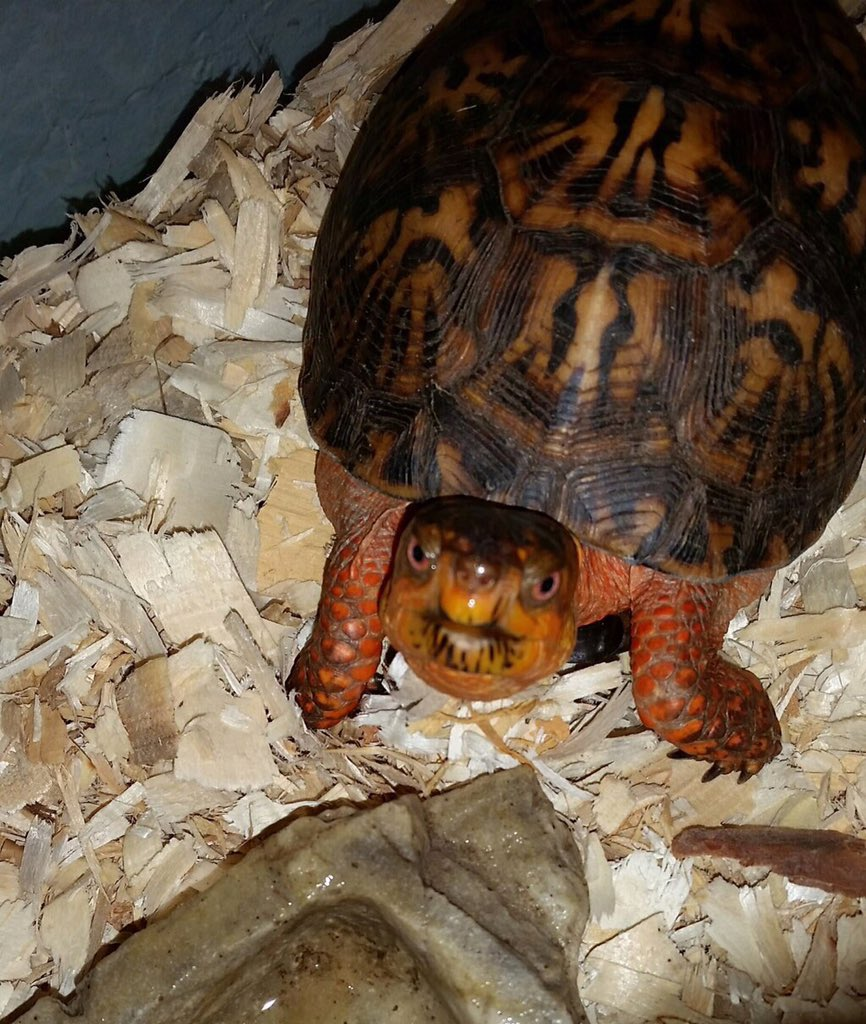

In [829]:
from IPython import display
display.Image("https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg", width = 500, height = 300)

WE can see that this is obviously not a dog but a box turtle

In [830]:
#Cleaning
# drop them from the dataframes
image_pred_clean = image_pred_clean[image_pred_clean.p1_dog == True]

#### Test

In [831]:
image_pred_clean

,tweet_id,jpg_url,img_num,p1,p1_dog,prob_final
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True,0.560311
...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,True,0.341703
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,True,0.425595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,True,0.555712
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,True,0.716012


### Quality Issue 10: Capitalize each dog name

#### Define 

We need to capitalize all final dog names <br>
To do that, we first need to make sure the column headings are in shape

#### Code

In [832]:
 # renaming columns appropriately
image_pred_clean.rename(columns = {'p1':'dog_breed', 'p1_dog':'dog'
                                  }, inplace = True)

In [833]:
#Capitalizing
image_pred_clean['dog_breed'] = [x.capitalize() for x in image_pred_clean['dog_breed']]

#### Test

In [834]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,dog_breed,dog,prob_final
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,True,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,True,0.560311


### Quality Issue 11: rename 'id' column to 'tweet_id'

#### Define

The 'tweet_id' column which is common to the three tables should be spelt the same for merging purpose

In [835]:
#Viewing the problem
tweet_rem_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,7024,33860
1,892177421306343426,5304,29360
2,891815181378084864,3488,22084
3,891689557279858688,7236,36985
4,891327558926688256,7775,35360


#### Code

In [836]:
tweet_rem_clean.rename(columns = {'id':'tweet_id'
                                  }, inplace = True)

#### Test

In [837]:
tweet_rem_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7024,33860
1,892177421306343426,5304,29360
2,891815181378084864,3488,22084
3,891689557279858688,7236,36985
4,891327558926688256,7775,35360


### Tidiness Issue 1: Dog stages should be combined to one column

#### Define

All the dog stages needed to be merged into a single column. A single column should contain the breed of the dogs

In [838]:
# Viewing The problem
twitter_archive_clean[['doggo','floofer','pupper','puppo']]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
2351,None,None,None,None
2352,None,None,None,None
2353,None,None,None,None
2354,None,None,None,None


#### Code

We would begin by changing all the "None" to Empty string, so we can have a clean merging

In [839]:
# Handle None
twitter_archive_clean.doggo.replace('None', '', inplace=True) 
twitter_archive_clean.floofer.replace('None', '', inplace=True) 
twitter_archive_clean.pupper.replace('None', '', inplace=True) 
twitter_archive_clean.puppo.replace('None', '', inplace=True)

Once that is taken care off, we would proceed to merging

In [840]:
# Merge the three columns into one
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

In [841]:
# Viewing the newly created column
twitter_archive_clean['dog_stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

We noticed the presence of some combined types (doggopupper,doggopupper). <br>
This is because a dog can have more than one type

In [842]:
# Handling Multiple stages

twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper' 
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo' 
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [843]:
twitter_archive_clean['dog_stage'].value_counts()

                  1761
pupper             221
doggo               72
puppo               23
doggo, pupper        9
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [844]:
# Handle missing Values
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

Since we have a new column created, we no longer need the previous ones and would be droppng them off the dataframe

In [845]:
twitter_archive_clean.drop(['doggo','floofer','pupper',
                            'puppo'], axis = 1, inplace = True)

#### Test

In [846]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   float64            
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 211.1+ KB


### Tidiness Issue 2: Merge three DataFrame to One Master dataFrame

#### Define

The Three cleaned dataframe needs to be merged into one master dataframe

#### Code

In [847]:
# merging the three tables 
twitter_archive_master = twitter_archive_clean.merge(tweet_rem_clean,  on='tweet_id' ).merge( image_pred_clean, on='tweet_id')


#### Test

In [848]:
twitter_archive_master.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,dog,prob_final
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,5304,29360,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,True,0.323581


<a id='Storing'></a>
## Storing Data

We would merge by chaining the three tables

TO CSV

In [849]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False, header=True)

<a id='EDA'></a>
## Analyzing and Visualizing Data


In [850]:
# Load new DataFrame

twitter_data = pd.read_csv('twitter_archive_master.csv')

We would be answering and visualizing the folling questions
- Most popular dog breed
- What are most common names given to dogs
-  What is the most often and lowest rating given to dogs
- Which post has the highest likes and retweet of all time

#### Question 1: Most popular dog breed

In [851]:
# getting the count of breeds
twitter_data.dog_breed.value_counts()

Golden_retriever      137
Labrador_retriever     91
Pembroke               88
Chihuahua              78
Pug                    54
                     ... 
Standard_schnauzer      1
Japanese_spaniel        1
Entlebucher             1
Clumber                 1
Groenendael             1
Name: dog_breed, Length: 111, dtype: int64

The Golden_retriever appears to be the most popular owned dog breeds, this can be better understood through visualization

Text(0.5, 1.0, 'Most Popular Dog Breed')

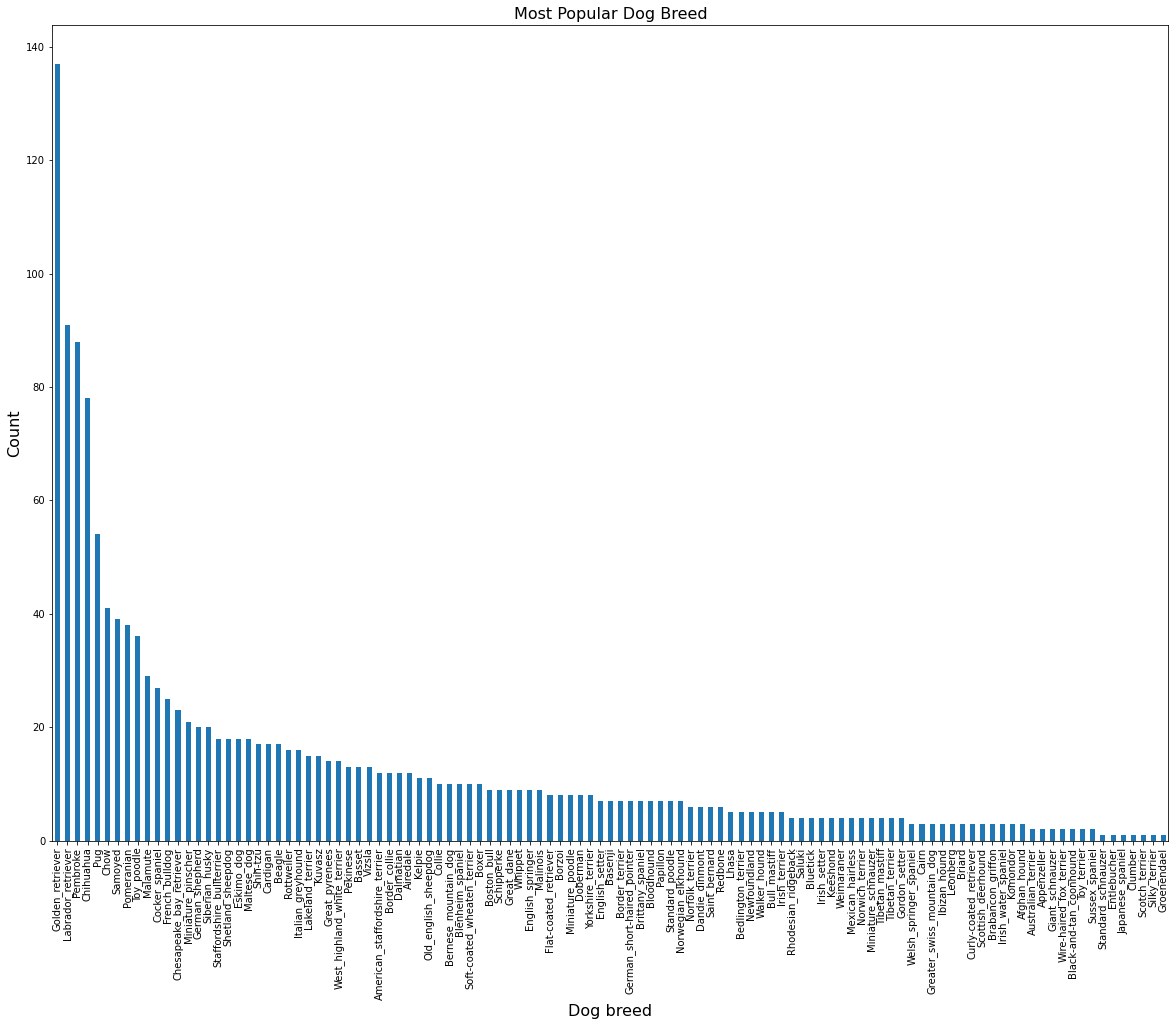

In [852]:
plt.figure( figsize=(20,15) )
twitter_data.dog_breed.value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.xlabel('Dog breed', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Most Popular Dog Breed', fontsize=16)

The above visualization reflects that the Golden Retriever is the most popular breed

#### Question 2: What are most common names given to dogs

In [853]:
# What are most common names given to dogs
top_names = twitter_data.name.value_counts().nlargest(10)[1:]
top_names

Cooper     10
Oliver      9
Charlie     9
Tucker      8
Penny       7
Sadie       7
Daisy       7
Lucy        7
Winston     6
Name: name, dtype: int64

Text(0.5, 1.0, 'Most Common Name given to dogs')

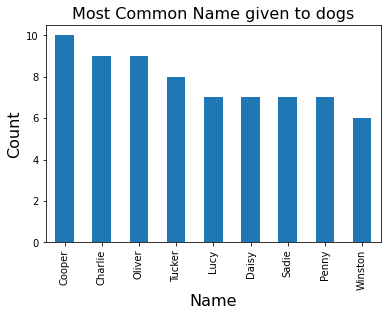

In [854]:
top_names.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Name', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Most Common Name given to dogs', fontsize=16)

"Cooper" appears to be the most common name given to dogs <br>

We can also clearly see this in the wordcloud below

In [855]:
#!pip install wordcloud

In [856]:
from wordcloud import WordCloud

In [857]:
#Create a temporary clean name column
clean_name = twitter_data[twitter_data.name != 'None']

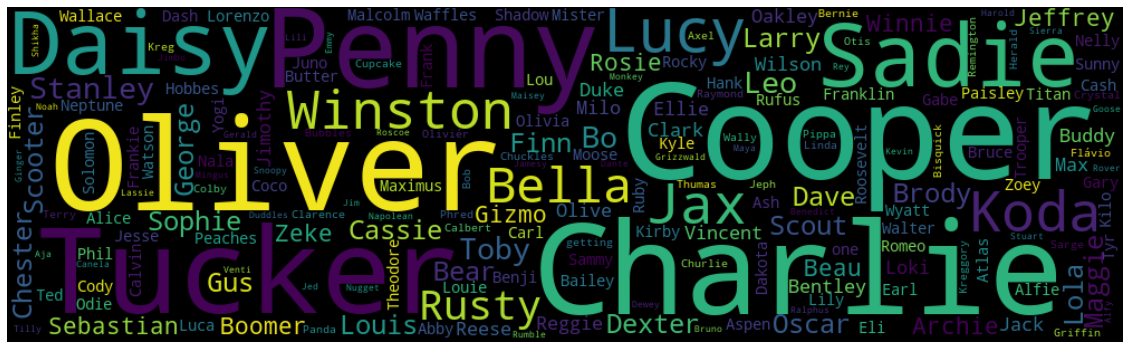

In [858]:
plt.figure( figsize=(20,15) )
allWords = ' '.join([txt for txt in clean_name['name']])
wordcloud = WordCloud(width = 1000, height = 300, random_state = 30, max_font_size = 120).generate(allWords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

#### Question 3: What is the most often and lowest rating given to dogs

In [859]:
# get ratings

ratings = twitter_data.rating_numerator.value_counts().sort_values(ascending=False)
ratings

12.0    390
10.0    316
11.0    305
13.0    204
9.0     107
8.0      58
7.0      24
14.0     19
6.0      12
5.0       9
4.0       5
3.0       3
13.5      1
2.0       1
1.0       1
Name: rating_numerator, dtype: int64

Text(0.5, 1.0, 'Ratings given to Dogs')

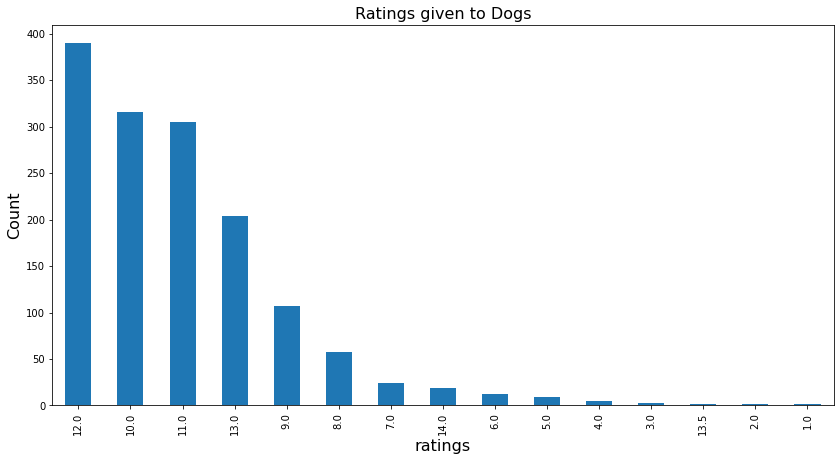

In [860]:
plt.figure( figsize=(14,7) )
ratings.plot(kind = 'bar')
plt.xlabel('ratings', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Ratings given to Dogs', fontsize=16)

ratings 12/10 is most often given to dogs while 2/10 is the least given to dogs <br>

We should examine why a dog got 2/10 rating

In [861]:
twitter_data.query('rating_numerator == 2')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,dog,prob_final
1083,678424312106393600,2015-12-20 03:58:55+00:00,This is Crystal. She's a shitty fireman. No se...,2.0,10,Crystal,NaN,2287,5007,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,Maltese_dog,True,0.759945


Crystal, a Maltese dog breed got a 2/10 rating, but WHY? <br>

Perherps a visual examination would jelp clarify, let us load up the image of Crystal

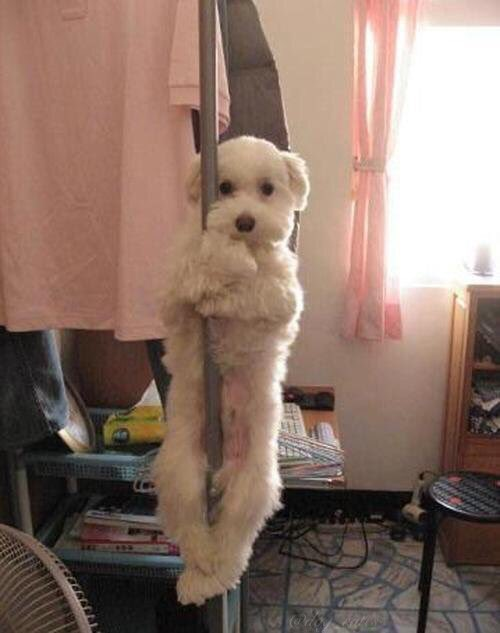

In [862]:
#Visual assesment
display.Image("https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg", width = 500, height = 300)

In [863]:
# Check the text from the original dataframe

twitter_data.text[1142]

'This is Ellie AKA Queen Slayer of the Orbs. Very self-motivated. Great yard. Rad foliage.  would pet diligently '

i dont know why Crystal got a 2/10, but would definitely give her a 13/10 :)



#### Question 4: Which post has the highest likes and retweet of all time

In [864]:
#What is the highest like we have
highest_like = twitter_data.favorite_count.max(axis = 0)
highest_like

145083

In [865]:
#What is the highest retweet we have
highest_retweet = twitter_data.retweet_count.max(axis = 0)
highest_retweet

70886

In [866]:
#Check what post they belong to

twitter_data.loc[twitter_data['favorite_count'].idxmax()]

tweet_id                                             744234799360020481
timestamp                                     2016-06-18 18:26:18+00:00
text                  Here's a doggo realizing you can stand in a po...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
dog_stage                                                         doggo
retweet_count                                                     70886
favorite_count                                                   145083
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                               1
dog_breed                                            Labrador_retriever
dog                                                                True
prob_final                                                     0

So tweet_id 744234799360020481 has the hightest like and retweet of all time, scoring a sum of 145k Likes and 70k retweets <br>

Lets have a look at the superstar : )

In [867]:
#Pulling up the row
twitter_data.query('tweet_id == "744234799360020481"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,dog,prob_final
607,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,13.0,10,None,doggo,70886,145083,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,True,0.825333


In [868]:
# pulling up tweet text
twitter_data.text[660]

'When your teacher agreed on 10,000 RTs and no final but after 24 hours you only have 37...  '

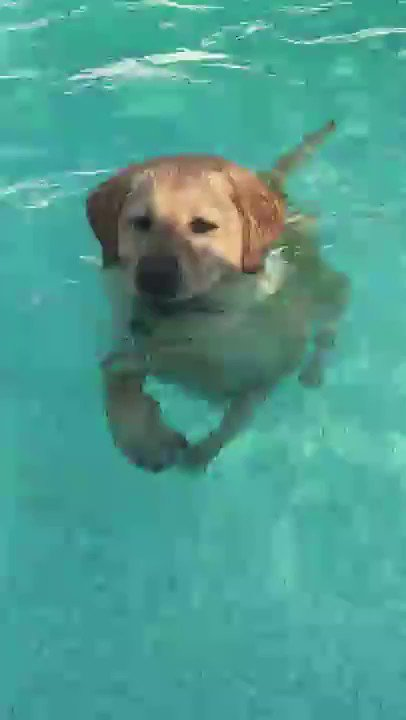

In [869]:
#Pulling up tweet image
display.Image("https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg", width = 500, height = 300)

Looks like our superstar is a Swimmer. Cool. <br>
: )

#### Bonus: Lets have a WordCloud View of the "text" column

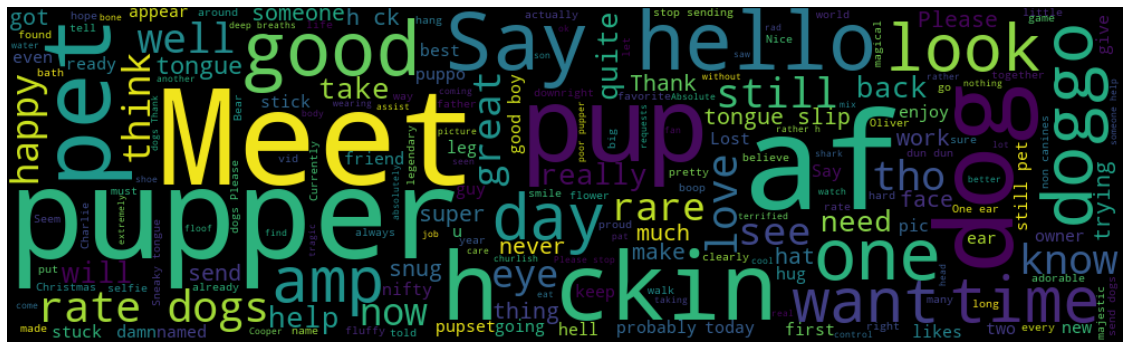

In [870]:
plt.figure( figsize=(20,15) )
allWords = ' '.join([txt for txt in twitter_data['text']])
wordcloud = WordCloud(width = 1000, height = 300, random_state = 30, max_font_size = 120).generate(allWords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()




<a id='Conclusion'></a>
## Conclusion

Wrangling Summary
1. tweet text column was cleaned off, hashtags, "RTs" and hyperlink were all removed

2. Entries that were not original tweet (replies and retweets) were removed

3. Empty columns and columns with no importance were dropped

4. Timestamp column was converted to appropriate format

5. Decimal ratings was correctly extracted and replaced 

6. Outlier rating_numerator values was replaced with the mean 

7. Ratings_denominator values not equal to 10 was changed to 10

8. Incorrect dog names (a, an, the) was changed to "None"

9. Final prediction of the dog breed was gotten from the three predicted values

10. Each dog name was capitalized

11.  'id' column was renamed to 'tweet_id'

EDA Insights summary

1. Golden Retriever is the most popular breed or most owned dog breed

2. "Cooper" appears to be the most common name given to dogs

3. ratings 12/10 is most often given to dogs while 2/10 is the least given to dogs

4. tweet_id 744234799360020481 has the highest likes and retweet of all time, with a total of  145k Likes and 70k retweets


<a id='Limitations'></a>
## Limitations

1. About 20% of the data have the dog stages filled

2. The analysis and wrangling process was limited by my skills